#### 订单分析 读取数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
df=pd.read_excel('C:\\数据练习\8数据分析项目实战（一）：电商平台订单报表分析\\2月9日订单汇总.xlsx',sheet_name='Sheet1',engine='openpyxl')

In [8]:
df

,商品编号,商品名称,商品价格,票号,座位,一级地址,联系地址,渠道,下单时间,支付时间,支付单号,店铺名称,店铺id,订单状态,售后状态,是否海外购,税费
0,10002051,[追加限量]GSC 食戟之灵 薙切绘里奈 手办 再版,102.75,--,--,NaN,--,search,2019-02-09 16:00:00,2019-02-09 16:00:40,'4083290968857591808,会员购,2233,待支付,--,否,0
1,10007114,世嘉 Re:从零开始的异世界生活 雷姆 天使Ver. 景品手办 再版 附特典,16.35,--,--,NaN,--,sb_xp,2019-02-09 15:59:58,0002-11-30 00:00:00,'--,会员购,2233,已取消,--,否,0
2,10008309,野兽王国 Mini Egg Attack 漫威 死侍 Q版手办,19.35,--,--,NaN,--,search,2019-02-09 15:59:57,2019-02-09 16:00:11,'3083290859838570496,会员购,2233,待支付,--,否,0
3,10004204,哔哩哔哩 2233娘 假两件卫衣 周边,188.00,--,--,安徽省,安徽省 淮南市 凤台县 肖庙村,zb_zt,2019-02-09 15:59:54,2019-02-09 16:00:06,'3083290846249025536,会员购,2233,待发货,--,否,0
4,10007114,世嘉 Re:从零开始的异世界生活 雷姆 天使Ver. 景品手办 再版 附特典,16.35,--,--,NaN,--,card_dm,2019-02-09 15:59:50,2019-02-09 16:00:04,'3083290831387660288,会员购,2233,待支付,--,否,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20916,10007122,GSC SSSS.GRIDMAN 新条茜 粘土人,39.75,--,--,NaN,--,brand,2019-02-09 16:00:10,2019-02-09 16:00:30,'3083290957918445568,会员购,2233,待支付,--,否,0
20917,10004416,哔哩哔哩 拜年祭限定福袋 新年祈愿锦鲤 血统测试小礼包 周边,122.00,--,--,湖北省,湖北省 武汉市 青山区 武汉市第二轻工业学校,homepage,2019-02-09 16:00:09,2019-02-09 16:02:27,'4083290934063140864,会员购,2233,待发货,--,否,0
20918,10002294,艾漫 非人哉这边 金属书签白泽款 官方授权,35.00,--,--,上海市,上海市 上海市 杨浦区 民府小区10号602,card_dm,2019-02-09 16:00:07,2019-02-09 16:00:19,'3083290901128650752,艾漫动漫旗舰店,2235,待发货,--,否,0
20919,10008248,TAITO Re：从零开始的异世界生活 雷姆 景品手办,14.85,--,--,NaN,--,relatedproduct,2019-02-09 16:00:04,2019-02-09 16:05:53,'3083292305555492864,会员购,2233,待支付,--,否,0


#### 分析一天24小时的销量变化

##### 将下单时间转为24小时制

In [10]:
order_time_24h=df['下单时间'].apply(lambda x:time.strftime('%H',x.timetuple()))

In [11]:
order_time_24h

0        16
1        15
2        15
3        15
4        15
         ..
20916    16
20917    16
20918    16
20919    16
20920    16
Name: 下单时间, Length: 20921, dtype: object

##### 对此24小时制的序列进行计数分析

In [16]:
order_time_24h.value_counts(ascending=True)

05      66
06      79
07     140
04     167
03     224
08     307
02     439
09     567
01     645
11     921
10    1009
16    1040
00    1048
18    1126
15    1156
17    1176
13    1190
19    1254
12    1268
23    1311
14    1324
21    1331
22    1439
20    1694
Name: 下单时间, dtype: int64

##### 提取索引

In [19]:
x_index=order_time_24h.value_counts(ascending=True).index

In [20]:
x_index

Index(['05', '06', '07', '04', '03', '08', '02', '09', '01', '11', '10', '16',
       '00', '18', '15', '17', '13', '19', '12', '23', '14', '21', '22', '20'],
      dtype='object')

#### 可视化分析

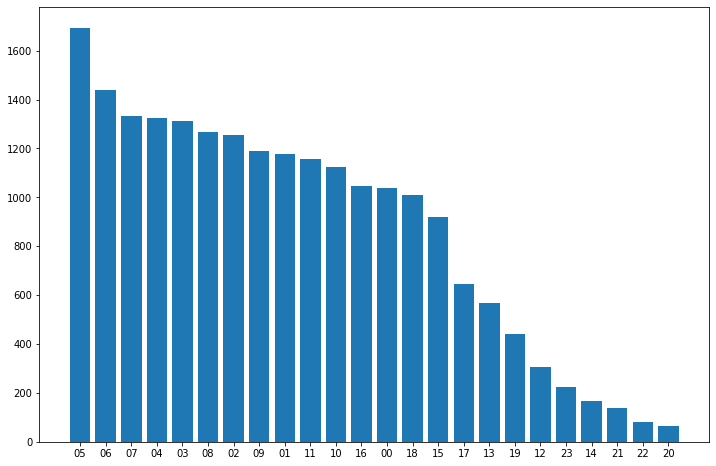

In [36]:
plt.figure(figsize=(12,8))
plt.bar(x=x_index,height=order_time_24h.value_counts(ascending=False))
plt.show()

#### 帕累托分析

In [39]:
p=order_time_24h.value_counts(ascending=False).cumsum()/order_time_24h.value_counts(ascending=False).sum()

In [27]:
p

05    0.003155
06    0.006931
07    0.013623
04    0.021605
03    0.032312
08    0.046986
02    0.067970
09    0.095072
01    0.125902
11    0.169925
10    0.218154
16    0.267865
00    0.317958
18    0.371780
15    0.427035
17    0.483246
13    0.540127
19    0.600067
12    0.660676
23    0.723340
14    0.786626
21    0.850246
22    0.919029
20    1.000000
Name: 下单时间, dtype: float64

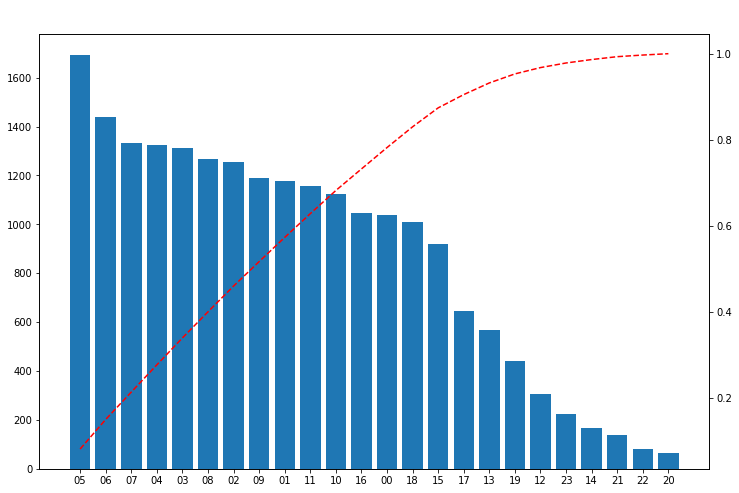

In [44]:
plt.figure(figsize=(12,8))
ax1=plt.gca()
ax2=ax1.twinx()
ax1.bar(x=x_index,height=order_time_24h.value_counts(ascending=False))
ax2.plot(x_index,p,color='red',linestyle='--')
plt.title('Pareto Analysis',fontdict={'family':'simhei','size':'30','color':'White'})
plt.show()

#### 分析一天24小时制客单价变化

##### 提取数据

In [45]:
Price_Time=df[['下单时间','商品价格']]

In [46]:
Price_Time

,下单时间,商品价格
0,2019-02-09 16:00:00,102.75
1,2019-02-09 15:59:58,16.35
2,2019-02-09 15:59:57,19.35
3,2019-02-09 15:59:54,188.00
4,2019-02-09 15:59:50,16.35
...,...,...
20916,2019-02-09 16:00:10,39.75
20917,2019-02-09 16:00:09,122.00
20918,2019-02-09 16:00:07,35.00
20919,2019-02-09 16:00:04,14.85


In [49]:
Price_Time['下单时间']=Price_Time['下单时间'].apply(lambda x:time.strftime('%H',x.timetuple()))

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
Price_Time

,下单时间,商品价格
0,16,102.75
1,15,16.35
2,15,19.35
3,15,188.00
4,15,16.35
...,...,...
20916,16,39.75
20917,16,122.00
20918,16,35.00
20919,16,14.85


In [57]:
Price_Time_24h=pd.pivot_table(data=Price_Time,values='商品价格',index='下单时间',aggfunc=np.mean)

In [68]:
Price_Time_24h

,商品价格
下单时间,
00,165.886260
01,161.760977
02,171.987358
03,169.988393
04,202.660479
05,117.543182
06,191.989873
07,146.936429
08,150.645603


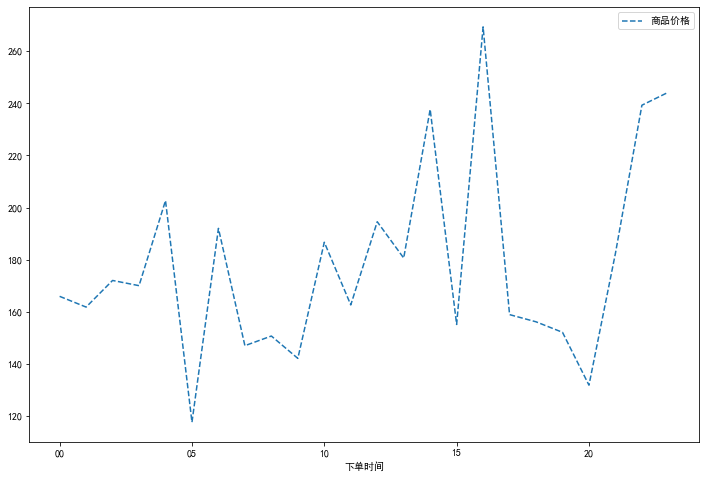

In [64]:
Price_Time_24h.plot(kind='line',linestyle='--',figsize=(12,8))
plt.rcParams['font.sans-serif']=['SimHei']
plt.show()

#### 客单价与销量随时间交叉分析

In [81]:
order_time_24h.value_counts(ascending=True)

05      66
06      79
07     140
04     167
03     224
08     307
02     439
09     567
01     645
11     921
10    1009
16    1040
00    1048
18    1126
15    1156
17    1176
13    1190
19    1254
12    1268
23    1311
14    1324
21    1331
22    1439
20    1694
Name: 下单时间, dtype: int64

In [82]:
Quantity_Price_Time_24h=pd.concat((Price_Time_24h,order_time_24h.value_counts(ascending=True)),axis=1)

In [86]:
Quantity_Price_Time_24h_rename=Quantity_Price_Time_24h.rename(columns={'下单时间':'订单量'})

In [90]:
Quantity_Price_Time_24h_rename_index=Quantity_Price_Time_24h_rename.reset_index().rename(columns={'index':'下单时间'}).set_index('下单时间')

In [91]:
Quantity_Price_Time_24h_rename_index

,商品价格,订单量
下单时间,,
00,165.886260,1048
01,161.760977,645
02,171.987358,439
03,169.988393,224
04,202.660479,167
05,117.543182,66
06,191.989873,79
07,146.936429,140
08,150.645603,307


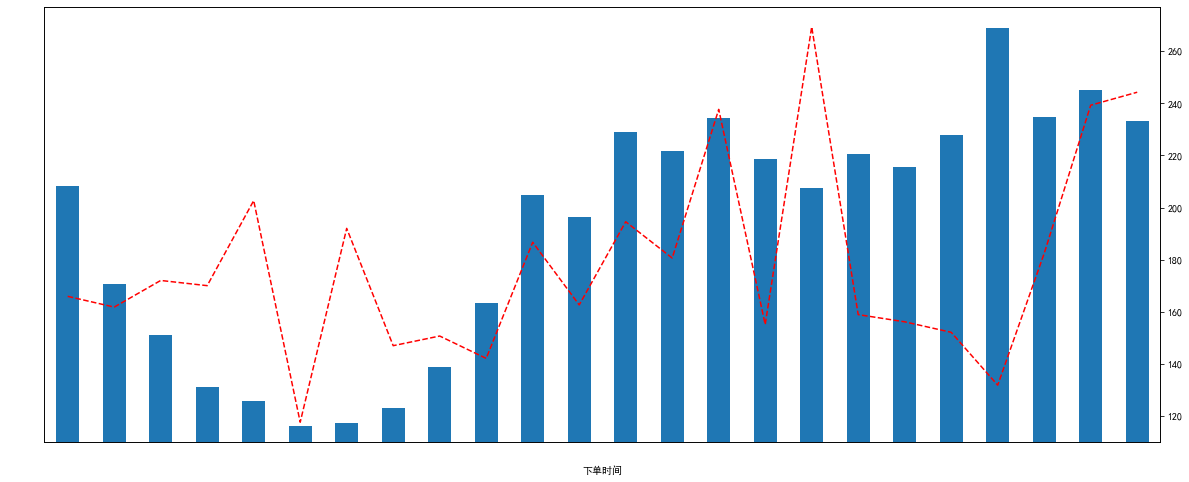

In [115]:
ax=plt.gca()
ax.tick_params(axis='y', colors='White', width=1,labelsize=15)
ax.tick_params(axis='x', colors='White', width=1,labelsize=15)
Quantity_Price_Time_24h_rename_index['订单量'].plot(kind='bar',figsize=(20,8))
Quantity_Price_Time_24h_rename_index['商品价格'].plot(kind='line',linestyle='--',figsize=(20,8),color='Red',secondary_y=True)
plt.show()

#### 将原始数据增加24小时制的时间列

In [100]:
df

,商品编号,商品名称,商品价格,票号,座位,一级地址,联系地址,渠道,下单时间,支付时间,支付单号,店铺名称,店铺id,订单状态,售后状态,是否海外购,税费
0,10002051,[追加限量]GSC 食戟之灵 薙切绘里奈 手办 再版,102.75,--,--,NaN,--,search,2019-02-09 16:00:00,2019-02-09 16:00:40,'4083290968857591808,会员购,2233,待支付,--,否,0
1,10007114,世嘉 Re:从零开始的异世界生活 雷姆 天使Ver. 景品手办 再版 附特典,16.35,--,--,NaN,--,sb_xp,2019-02-09 15:59:58,0002-11-30 00:00:00,'--,会员购,2233,已取消,--,否,0
2,10008309,野兽王国 Mini Egg Attack 漫威 死侍 Q版手办,19.35,--,--,NaN,--,search,2019-02-09 15:59:57,2019-02-09 16:00:11,'3083290859838570496,会员购,2233,待支付,--,否,0
3,10004204,哔哩哔哩 2233娘 假两件卫衣 周边,188.00,--,--,安徽省,安徽省 淮南市 凤台县 肖庙村,zb_zt,2019-02-09 15:59:54,2019-02-09 16:00:06,'3083290846249025536,会员购,2233,待发货,--,否,0
4,10007114,世嘉 Re:从零开始的异世界生活 雷姆 天使Ver. 景品手办 再版 附特典,16.35,--,--,NaN,--,card_dm,2019-02-09 15:59:50,2019-02-09 16:00:04,'3083290831387660288,会员购,2233,待支付,--,否,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20916,10007122,GSC SSSS.GRIDMAN 新条茜 粘土人,39.75,--,--,NaN,--,brand,2019-02-09 16:00:10,2019-02-09 16:00:30,'3083290957918445568,会员购,2233,待支付,--,否,0
20917,10004416,哔哩哔哩 拜年祭限定福袋 新年祈愿锦鲤 血统测试小礼包 周边,122.00,--,--,湖北省,湖北省 武汉市 青山区 武汉市第二轻工业学校,homepage,2019-02-09 16:00:09,2019-02-09 16:02:27,'4083290934063140864,会员购,2233,待发货,--,否,0
20918,10002294,艾漫 非人哉这边 金属书签白泽款 官方授权,35.00,--,--,上海市,上海市 上海市 杨浦区 民府小区10号602,card_dm,2019-02-09 16:00:07,2019-02-09 16:00:19,'3083290901128650752,艾漫动漫旗舰店,2235,待发货,--,否,0
20919,10008248,TAITO Re：从零开始的异世界生活 雷姆 景品手办,14.85,--,--,NaN,--,relatedproduct,2019-02-09 16:00:04,2019-02-09 16:05:53,'3083292305555492864,会员购,2233,待支付,--,否,0


In [110]:
##转24H制
df['下单时间'].apply(lambda x:time.strftime('%H',x.timetuple()))

0        16
1        15
2        15
3        15
4        15
         ..
20916    16
20917    16
20918    16
20919    16
20920    16
Name: 下单时间, Length: 20921, dtype: object

In [111]:
df.insert(df.columns.get_loc('下单时间'),'下单时间_24H',df['下单时间'].apply(lambda x:time.strftime('%H',x.timetuple())))

In [302]:
df=df.astype({'商品编号':str})

In [303]:
df

,商品编号,商品名称,商品价格,票号,座位,一级地址,联系地址,渠道,下单时间_24H,下单时间,支付时间,支付单号,店铺名称,店铺id,订单状态,售后状态,是否海外购,税费
0,10002051,[追加限量]GSC 食戟之灵 薙切绘里奈 手办 再版,102.75,--,--,NaN,--,search,16,2019-02-09 16:00:00,2019-02-09 16:00:40,'4083290968857591808,会员购,2233,待支付,--,否,0
1,10007114,世嘉 Re:从零开始的异世界生活 雷姆 天使Ver. 景品手办 再版 附特典,16.35,--,--,NaN,--,sb_xp,15,2019-02-09 15:59:58,0002-11-30 00:00:00,'--,会员购,2233,已取消,--,否,0
2,10008309,野兽王国 Mini Egg Attack 漫威 死侍 Q版手办,19.35,--,--,NaN,--,search,15,2019-02-09 15:59:57,2019-02-09 16:00:11,'3083290859838570496,会员购,2233,待支付,--,否,0
3,10004204,哔哩哔哩 2233娘 假两件卫衣 周边,188.00,--,--,安徽省,安徽省 淮南市 凤台县 肖庙村,zb_zt,15,2019-02-09 15:59:54,2019-02-09 16:00:06,'3083290846249025536,会员购,2233,待发货,--,否,0
4,10007114,世嘉 Re:从零开始的异世界生活 雷姆 天使Ver. 景品手办 再版 附特典,16.35,--,--,NaN,--,card_dm,15,2019-02-09 15:59:50,2019-02-09 16:00:04,'3083290831387660288,会员购,2233,待支付,--,否,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20916,10007122,GSC SSSS.GRIDMAN 新条茜 粘土人,39.75,--,--,NaN,--,brand,16,2019-02-09 16:00:10,2019-02-09 16:00:30,'3083290957918445568,会员购,2233,待支付,--,否,0
20917,10004416,哔哩哔哩 拜年祭限定福袋 新年祈愿锦鲤 血统测试小礼包 周边,122.00,--,--,湖北省,湖北省 武汉市 青山区 武汉市第二轻工业学校,homepage,16,2019-02-09 16:00:09,2019-02-09 16:02:27,'4083290934063140864,会员购,2233,待发货,--,否,0
20918,10002294,艾漫 非人哉这边 金属书签白泽款 官方授权,35.00,--,--,上海市,上海市 上海市 杨浦区 民府小区10号602,card_dm,16,2019-02-09 16:00:07,2019-02-09 16:00:19,'3083290901128650752,艾漫动漫旗舰店,2235,待发货,--,否,0
20919,10008248,TAITO Re：从零开始的异世界生活 雷姆 景品手办,14.85,--,--,NaN,--,relatedproduct,16,2019-02-09 16:00:04,2019-02-09 16:05:53,'3083292305555492864,会员购,2233,待支付,--,否,0


##### 16时客单价最高，单独分析此处客单价的渠道

In [120]:
df_channel=df[['下单时间_24H','渠道']][df['下单时间_24H']=='16']

In [160]:
#渠道列全部转文本
df_channel=df_channel.astype({'渠道':str})

In [161]:
df_channel

,下单时间_24H,渠道
0,16,search
19882,16,category_sb
19883,16,search
19884,16,search
19885,16,shoppingcart
...,...,...
20916,16,brand
20917,16,homepage
20918,16,card_dm
20919,16,relatedproduct


In [162]:
#方法1
pd.pivot_table(data=df_channel,values='下单时间_24H',index='渠道',aggfunc='count')

,下单时间_24H
渠道,
--,4
233,6
articleDetail_1950446,1
articleDetail_1998727,1
banner,1
board,6
brand,1
bzb_zb,1
capsuleToys,2


In [163]:
Channel=pd.pivot_table(data=df_channel,values='下单时间_24H',index='渠道',aggfunc='count')

In [164]:
Channel

,下单时间_24H
渠道,
--,4
233,6
articleDetail_1950446,1
articleDetail_1998727,1
banner,1
board,6
brand,1
bzb_zb,1
capsuleToys,2


In [134]:
Channel.sort_values(by='下单时间_24H',ascending=False)

,下单时间_24H
渠道,
search,222
category_sb,115
homepage,103
card_item,97
shoppingcart,86
card_dm,83
category_zb,42
category_3_1,37
relatedproduct,28


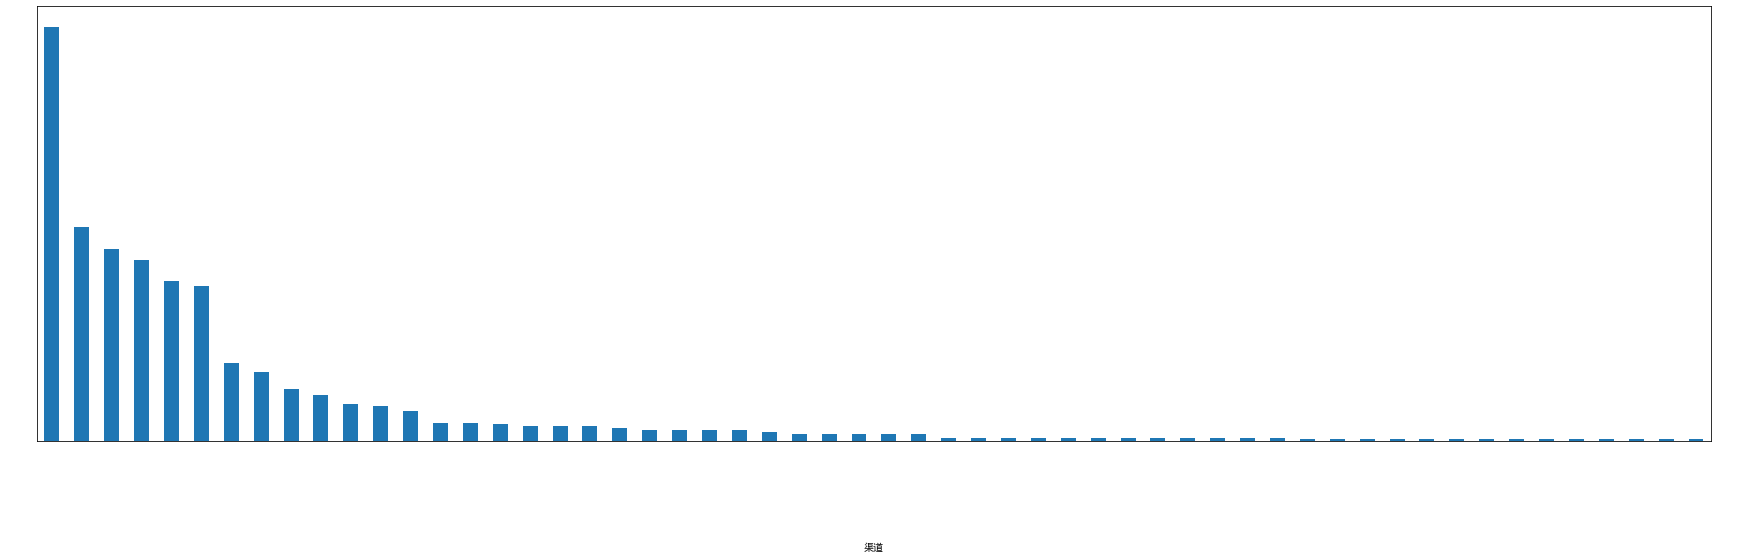

In [261]:
#此处不把DataFrame变成Series也可以画出图形，由于要人工干预坐标轴的属性不把['下单时间_24Series取出测试无法适配白色坐标轴及文本大小的适配Channel.sort_values(by='下单时间_24H',ascending=False)['下单时间_24H']
ax=plt.gca()
ax.tick_params(axis='y', colors='White', width=1,labelsize=15)
ax.tick_params(axis='x', colors='White', width=1,labelsize=15)
Channel.sort_values(by='下单时间_24H',ascending=False)['下单时间_24H'].plot(kind='bar',figsize=(30,8),rot=30)
plt.show()

In [168]:
#方法2
df_channel['渠道'].value_counts()

search                   222
category_sb              115
homepage                 103
card_item                 97
shoppingcart              86
card_dm                   83
category_zb               42
category_3_1              37
relatedproduct            28
category_mx               25
search_sug                20
sb_xp                     19
new_product               16
homepage_actoys           10
mall_mine                 10
zhc_jlfd                   9
zhc_sb                     8
zhc_bk                     8
zb_shcj                    8
card_ugc                   7
233                        6
zhc_cy                     6
category_2_1               6
board                      6
mx_gd                      5
--                         4
category_2_5               4
ip                         4
zb_10003959                4
homepage_category          4
capsuleToys                2
undefined                  2
mine_v5.29                 2
mx_baokuan                 2
singlemessage 

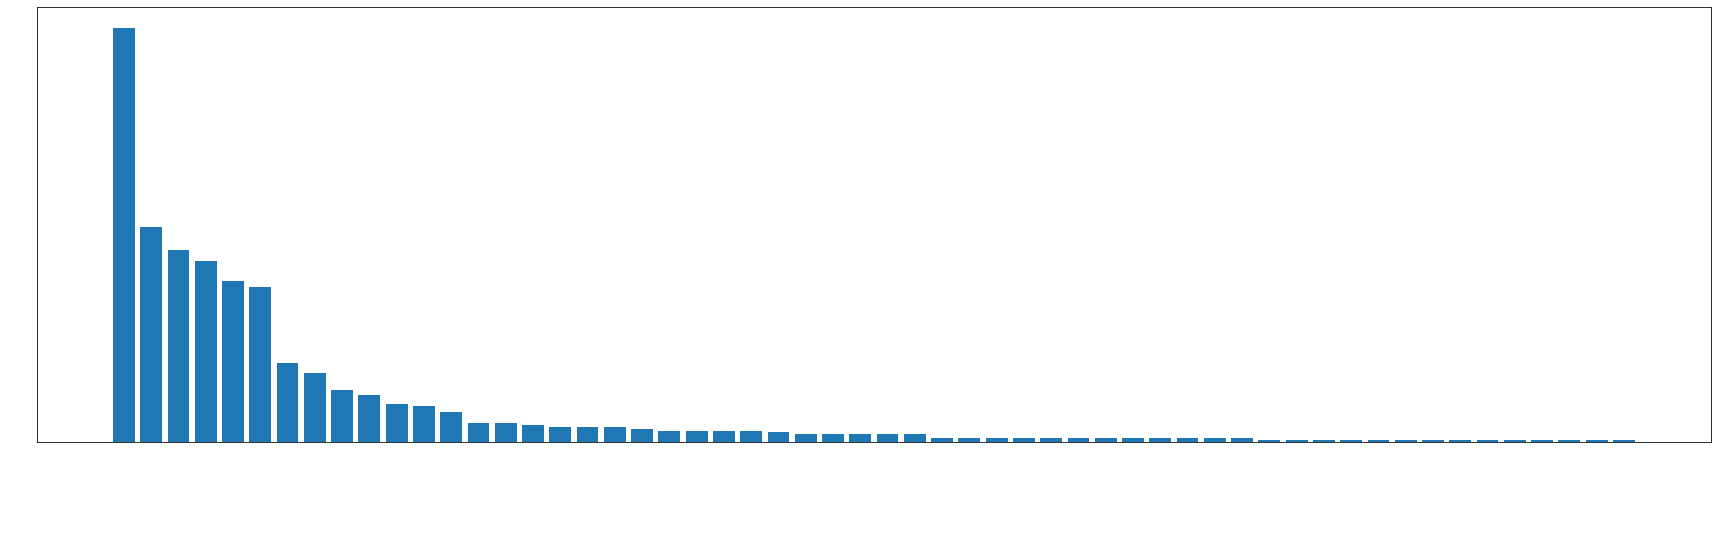

In [174]:
plt.figure(figsize=(30,8))
ax=plt.gca()
ax.tick_params(axis='y', colors='White', width=1,labelsize=15)
ax.tick_params(axis='x', colors='White', width=1,labelsize=15)
plt.bar(df_channel['渠道'].value_counts().index,df_channel['渠道'].value_counts())
plt.xticks(rotation=30)
plt.show()

### 不考虑时间的商品分析

In [175]:
df

,商品编号,商品名称,商品价格,票号,座位,一级地址,联系地址,渠道,下单时间_24H,下单时间,支付时间,支付单号,店铺名称,店铺id,订单状态,售后状态,是否海外购,税费
0,10002051,[追加限量]GSC 食戟之灵 薙切绘里奈 手办 再版,102.75,--,--,NaN,--,search,16,2019-02-09 16:00:00,2019-02-09 16:00:40,'4083290968857591808,会员购,2233,待支付,--,否,0
1,10007114,世嘉 Re:从零开始的异世界生活 雷姆 天使Ver. 景品手办 再版 附特典,16.35,--,--,NaN,--,sb_xp,15,2019-02-09 15:59:58,0002-11-30 00:00:00,'--,会员购,2233,已取消,--,否,0
2,10008309,野兽王国 Mini Egg Attack 漫威 死侍 Q版手办,19.35,--,--,NaN,--,search,15,2019-02-09 15:59:57,2019-02-09 16:00:11,'3083290859838570496,会员购,2233,待支付,--,否,0
3,10004204,哔哩哔哩 2233娘 假两件卫衣 周边,188.00,--,--,安徽省,安徽省 淮南市 凤台县 肖庙村,zb_zt,15,2019-02-09 15:59:54,2019-02-09 16:00:06,'3083290846249025536,会员购,2233,待发货,--,否,0
4,10007114,世嘉 Re:从零开始的异世界生活 雷姆 天使Ver. 景品手办 再版 附特典,16.35,--,--,NaN,--,card_dm,15,2019-02-09 15:59:50,2019-02-09 16:00:04,'3083290831387660288,会员购,2233,待支付,--,否,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20916,10007122,GSC SSSS.GRIDMAN 新条茜 粘土人,39.75,--,--,NaN,--,brand,16,2019-02-09 16:00:10,2019-02-09 16:00:30,'3083290957918445568,会员购,2233,待支付,--,否,0
20917,10004416,哔哩哔哩 拜年祭限定福袋 新年祈愿锦鲤 血统测试小礼包 周边,122.00,--,--,湖北省,湖北省 武汉市 青山区 武汉市第二轻工业学校,homepage,16,2019-02-09 16:00:09,2019-02-09 16:02:27,'4083290934063140864,会员购,2233,待发货,--,否,0
20918,10002294,艾漫 非人哉这边 金属书签白泽款 官方授权,35.00,--,--,上海市,上海市 上海市 杨浦区 民府小区10号602,card_dm,16,2019-02-09 16:00:07,2019-02-09 16:00:19,'3083290901128650752,艾漫动漫旗舰店,2235,待发货,--,否,0
20919,10008248,TAITO Re：从零开始的异世界生活 雷姆 景品手办,14.85,--,--,NaN,--,relatedproduct,16,2019-02-09 16:00:04,2019-02-09 16:05:53,'3083292305555492864,会员购,2233,待支付,--,否,0


In [176]:
Sku=df[['商品编号','商品价格']]

In [177]:
Sku

,商品编号,商品价格
0,10002051,102.75
1,10007114,16.35
2,10008309,19.35
3,10004204,188.00
4,10007114,16.35
...,...,...
20916,10007122,39.75
20917,10004416,122.00
20918,10002294,35.00
20919,10008248,14.85


In [179]:
Sku_analysis=pd.pivot_table(data=Sku,values='商品价格',index='商品编号',aggfunc=np.mean)

In [180]:
#每个sku的价格
Sku_analysis

,商品价格
商品编号,
10000014,507.400000
10000024,517.000000
10000026,374.800000
10000029,422.000000
10000045,194.876471
...,...
10008403,35.700000
10008404,23.250000
10008405,170.850000


In [196]:
#获取频数，与分组上下限
count,bin_edges=np.histogram(Sku_analysis,100)

In [197]:
count

array([509, 260, 197, 114,  53,  27,  16,   4,   3,   4,   1,   1,   0,
         1,   2,   0,   0,   2,   0,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   1], dtype=int64)

In [198]:
bin_edges

array([1.00000000e+00, 1.40721667e+02, 2.80443333e+02, 4.20165000e+02,
       5.59886667e+02, 6.99608333e+02, 8.39330000e+02, 9.79051667e+02,
       1.11877333e+03, 1.25849500e+03, 1.39821667e+03, 1.53793833e+03,
       1.67766000e+03, 1.81738167e+03, 1.95710333e+03, 2.09682500e+03,
       2.23654667e+03, 2.37626833e+03, 2.51599000e+03, 2.65571167e+03,
       2.79543333e+03, 2.93515500e+03, 3.07487667e+03, 3.21459833e+03,
       3.35432000e+03, 3.49404167e+03, 3.63376333e+03, 3.77348500e+03,
       3.91320667e+03, 4.05292833e+03, 4.19265000e+03, 4.33237167e+03,
       4.47209333e+03, 4.61181500e+03, 4.75153667e+03, 4.89125833e+03,
       5.03098000e+03, 5.17070167e+03, 5.31042333e+03, 5.45014500e+03,
       5.58986667e+03, 5.72958833e+03, 5.86931000e+03, 6.00903167e+03,
       6.14875333e+03, 6.28847500e+03, 6.42819667e+03, 6.56791833e+03,
       6.70764000e+03, 6.84736167e+03, 6.98708333e+03, 7.12680500e+03,
       7.26652667e+03, 7.40624833e+03, 7.54597000e+03, 7.68569167e+03,
      

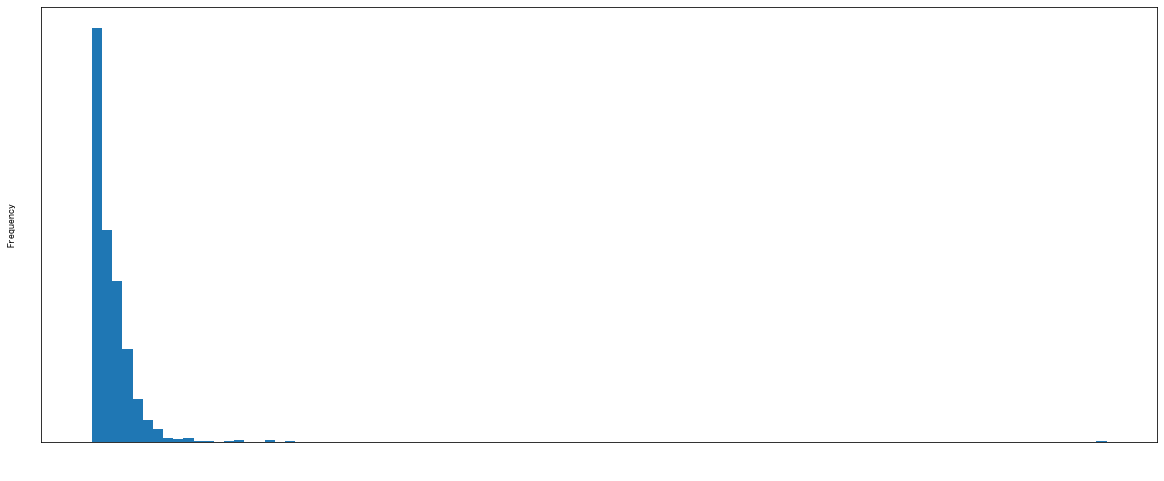

In [204]:
#什么价格范围内的销量最高
ax=plt.gca()
ax.tick_params(axis='x',colors='White',labelsize=10)
ax.tick_params(axis='y',colors='White',labelsize=10)
Sku_analysis['商品价格'].plot(kind='hist',figsize=(20,8),xticks=bin_edges,bins=100,rot=90)
plt.show()

In [218]:
#将np.histogram处理出来的频数与bin结合成Series，注意bins的数量比频数会多一个
p2=pd.Series(count,index=bin_edges[1:])

In [219]:
p2

140.721667      509
280.443333      260
420.165000      197
559.886667      114
699.608333       53
               ... 
13414.280000      0
13554.001667      0
13693.723333      0
13833.445000      0
13973.166667      1
Length: 100, dtype: int64

In [220]:
p2=p2.cumsum()/p2.sum()

In [221]:
p2

140.721667      0.425585
280.443333      0.642977
420.165000      0.807692
559.886667      0.903010
699.608333      0.947324
                  ...   
13414.280000    0.999164
13554.001667    0.999164
13693.723333    0.999164
13833.445000    0.999164
13973.166667    1.000000
Length: 100, dtype: float64

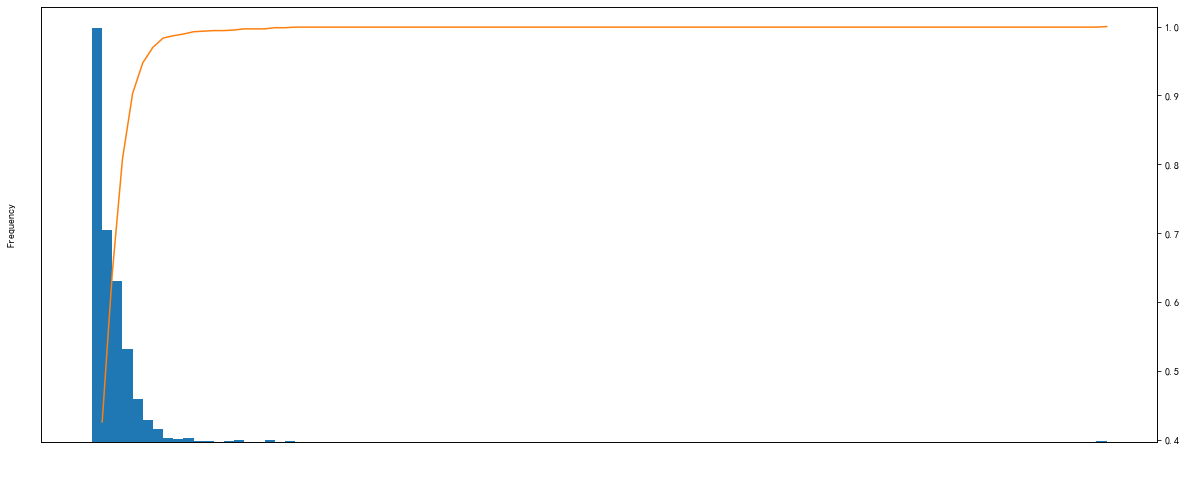

In [223]:
#什么价格范围内的销量最高&帕累托
ax=plt.gca()
ax.tick_params(axis='x',colors='White',labelsize=10)
ax.tick_params(axis='y',colors='White',labelsize=10)
Sku_analysis['商品价格'].plot(kind='hist',figsize=(20,8),xticks=bin_edges,bins=100,rot=90)
p2.plot(kind='line',figsize=(20,8),secondary_y=True,rot=90)
plt.show()

In [224]:
#分析top畅销产品
Sku['商品编号'].value_counts()

10007114    906
10007970    868
10008248    719
10004416    628
10003959    557
           ... 
10006193      1
10000598      1
10001810      1
10006841      1
10002294      1
Name: 商品编号, Length: 1196, dtype: int64

In [236]:
p3=Sku['商品编号'].value_counts()[0:100].cumsum()/Sku['商品编号'].value_counts()[0:100].sum()

In [237]:
p3

10007114    0.065161
10007970    0.127589
10008248    0.179301
10004416    0.224468
10003959    0.264528
              ...   
10002704    0.985688
10008407    0.989284
10008048    0.992880
10001394    0.996476
10000571    1.000000
Name: 商品编号, Length: 100, dtype: float64

In [246]:
p3.index=p3.index.astype(str)

In [253]:
p3

10007114    0.065161
10007970    0.127589
10008248    0.179301
10004416    0.224468
10003959    0.264528
              ...   
10002704    0.985688
10008407    0.989284
10008048    0.992880
10001394    0.996476
10000571    1.000000
Name: 商品编号, Length: 100, dtype: float64

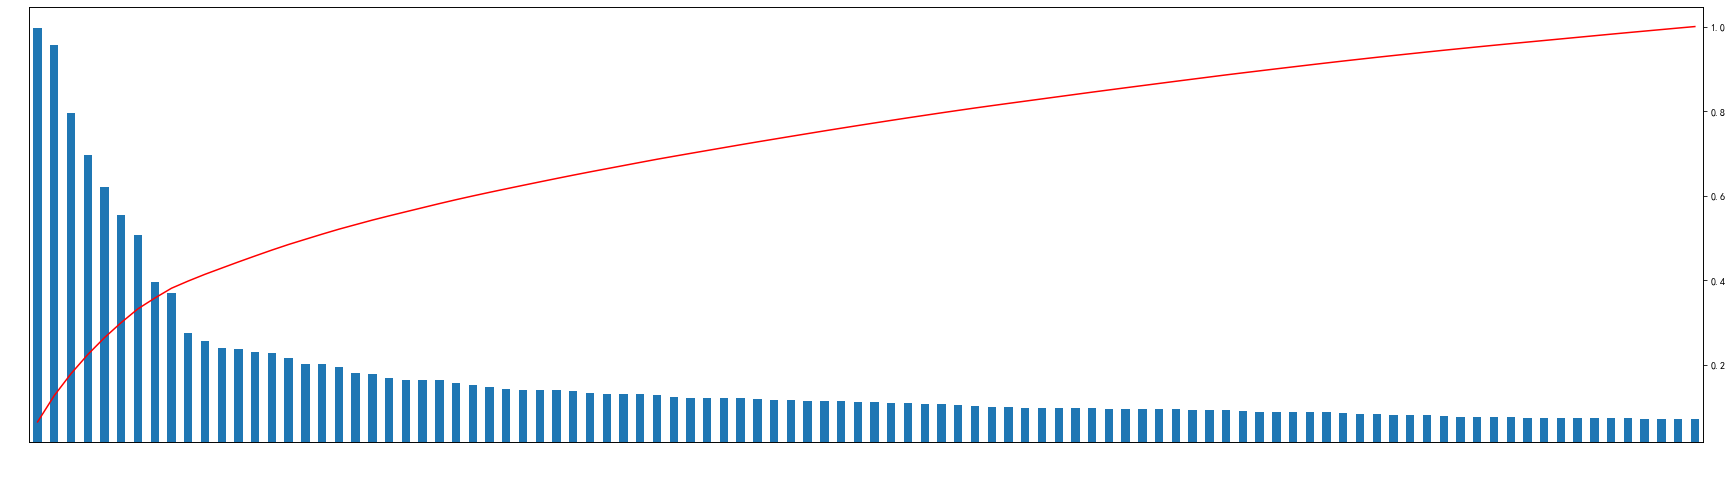

In [257]:
#前100畅销产品
ax=plt.gca()
ax.tick_params(axis='x',colors='White',labelsize=10)
ax.tick_params(axis='y',colors='White',labelsize=10)
Sku['商品编号'].value_counts()[0:100].plot(kind='bar',figsize=(30,8),rot=90)
p3.plot(kind='line',figsize=(30,8),secondary_y=True,rot=90,color='red')
plt.show()

### Sku与时间交叉分析（Top 5）

In [289]:
#分析topv5畅销产品
top_5_list=Sku['商品编号'].value_counts().head().index.astype(str).tolist()

In [290]:
top_5_list

['10007114', '10007970', '10008248', '10004416', '10003959']

In [304]:
Sku_24h=df[['下单时间_24H','商品编号','商品名称']][df['商品编号'].isin(top_5_list)]

In [305]:
Sku_24h

,下单时间_24H,商品编号,商品名称
1,15,10007114,世嘉 Re:从零开始的异世界生活 雷姆 天使Ver. 景品手办 再版 附特典
4,15,10007114,世嘉 Re:从零开始的异世界生活 雷姆 天使Ver. 景品手办 再版 附特典
5,15,10004416,哔哩哔哩 拜年祭限定福袋 新年祈愿锦鲤 血统测试小礼包 周边
6,15,10008248,TAITO Re：从零开始的异世界生活 雷姆 景品手办
13,15,10004416,哔哩哔哩 拜年祭限定福袋 新年祈愿锦鲤 血统测试小礼包 周边
...,...,...,...
20898,16,10007970,[追加限量]TAITO VOCALOID 初音未来 制服Ver. 景品手办
20902,16,10007970,[追加限量]TAITO VOCALOID 初音未来 制服Ver. 景品手办
20914,16,10008248,TAITO Re：从零开始的异世界生活 雷姆 景品手办
20917,16,10004416,哔哩哔哩 拜年祭限定福袋 新年祈愿锦鲤 血统测试小礼包 周边


In [306]:
Sku_24h_analysis=pd.pivot_table(data=Sku_24h,values='商品编号',index='下单时间_24H',columns='商品编号',aggfunc='count')

In [307]:
Sku_24h_analysis

商品编号,10003959,10004416,10007114,10007970,10008248
下单时间_24H,,,,,
00,36.0,NaN,44.0,43.0,40.0
01,8.0,NaN,30.0,22.0,25.0
02,18.0,NaN,18.0,18.0,11.0
03,6.0,NaN,12.0,9.0,8.0
04,8.0,NaN,8.0,7.0,2.0
05,1.0,NaN,NaN,3.0,2.0
06,1.0,NaN,2.0,1.0,2.0
07,5.0,NaN,10.0,3.0,6.0
08,11.0,NaN,8.0,6.0,13.0


In [323]:
map(int,Sku_24h_analysis.index)

In [324]:
list(map(int,Sku_24h_analysis.index))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

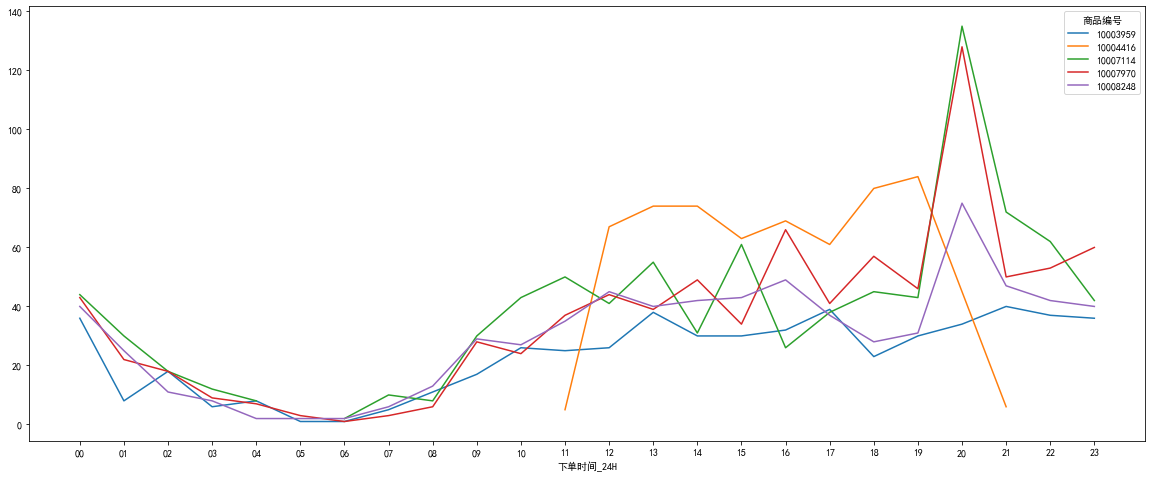

In [326]:
Sku_24h_analysis.plot(kind='line',figsize=(20,8),xticks=list(map(int,Sku_24h_analysis.index)))
plt.show()

### 地理分析

In [339]:
Region=df[['一级地址','商品价格']]

In [340]:
Region.dropna(axis=0,inplace=True)

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [341]:
Region

,一级地址,商品价格
3,安徽省,188.0
5,陕西省,122.0
7,湖北省,99.0
9,北京市,512.0
10,北京市,512.0
...,...,...
20903,湖北省,329.0
20905,湖北省,658.0
20913,福建省,99.0
20917,湖北省,122.0


In [343]:
Region_analysis=pd.pivot_table(data=Region,values='商品价格',index='一级地址',aggfunc=[np.mean,'count'])

In [344]:
Region_analysis.columns

MultiIndex([( 'mean', '商品价格'),
            ('count', '商品价格')],
           )

In [350]:
Region_analysis

,mean,count
,商品价格,商品价格
一级地址,,
上海市,307.972257,678
云南省,262.874408,211
内蒙古,325.180808,99
北京市,312.173961,467
吉林省,273.289247,93
四川省,277.512742,620
天津市,307.635632,174
宁夏回,200.857143,28


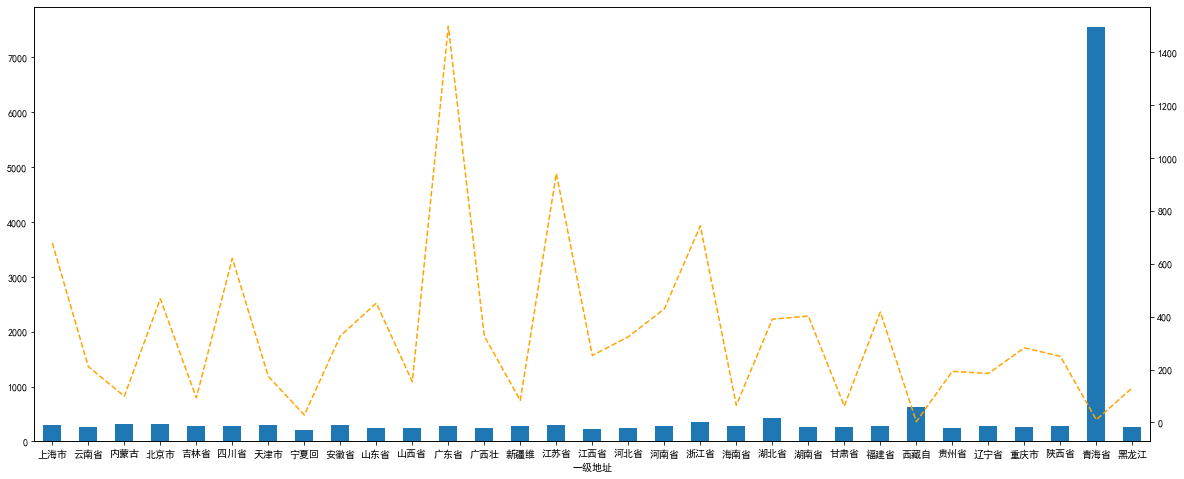

In [354]:
Region_analysis[( 'mean', '商品价格')].plot(kind='bar',figsize=(20,8))
Region_analysis[( 'count', '商品价格')].plot(kind='line',figsize=(20,8),linestyle='--',color='orange',secondary_y=True)
plt.show()

In [355]:
Region_analysis_drop_extreme=Region_analysis.drop(axis=0,index='青海省')

In [356]:
Region_analysis_drop_extreme

,mean,count
,商品价格,商品价格
一级地址,,
上海市,307.972257,678
云南省,262.874408,211
内蒙古,325.180808,99
北京市,312.173961,467
吉林省,273.289247,93
四川省,277.512742,620
天津市,307.635632,174
宁夏回,200.857143,28


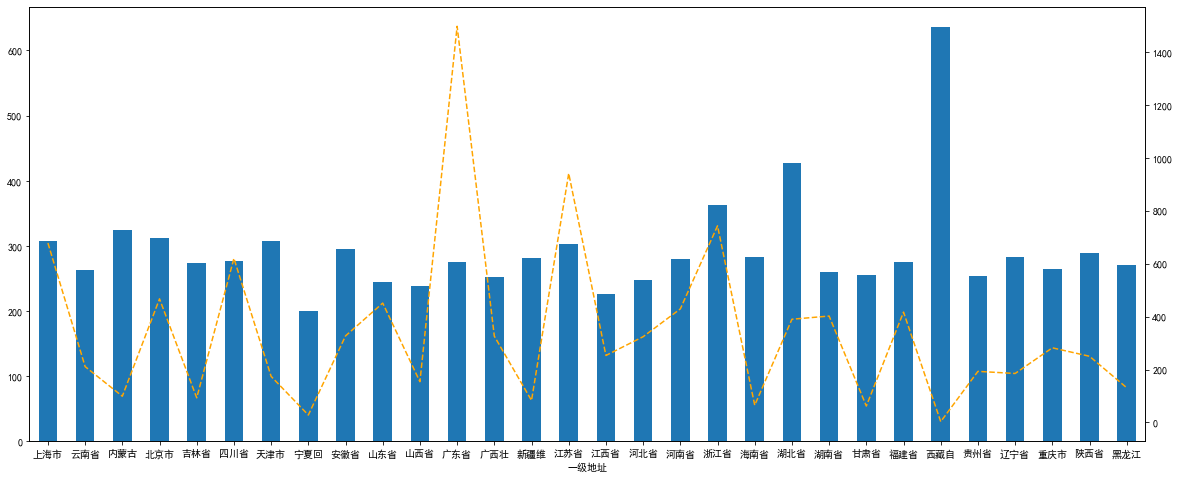

In [357]:
Region_analysis_drop_extreme[( 'mean', '商品价格')].plot(kind='bar',figsize=(20,8))
Region_analysis_drop_extreme[( 'count', '商品价格')].plot(kind='line',figsize=(20,8),linestyle='--',color='orange',secondary_y=True)
plt.show()

In [6]:
order_time_24h=df['下单时间'].apply(lambda x:x.timetuple())

In [7]:
order_time_24h

0          (2019, 2, 9, 16, 0, 0, 5, 40, -1)
1        (2019, 2, 9, 15, 59, 58, 5, 40, -1)
2        (2019, 2, 9, 15, 59, 57, 5, 40, -1)
3        (2019, 2, 9, 15, 59, 54, 5, 40, -1)
4        (2019, 2, 9, 15, 59, 50, 5, 40, -1)
                        ...                 
20916     (2019, 2, 9, 16, 0, 10, 5, 40, -1)
20917      (2019, 2, 9, 16, 0, 9, 5, 40, -1)
20918      (2019, 2, 9, 16, 0, 7, 5, 40, -1)
20919      (2019, 2, 9, 16, 0, 4, 5, 40, -1)
20920      (2019, 2, 9, 16, 0, 0, 5, 40, -1)
Name: 下单时间, Length: 20921, dtype: object

#### 尝试对2级地区信息进行数据分析及可视化

In [3]:
df

,商品编号,商品名称,商品价格,票号,座位,一级地址,联系地址,渠道,下单时间,支付时间,支付单号,店铺名称,店铺id,订单状态,售后状态,是否海外购,税费
0,10002051,[追加限量]GSC 食戟之灵 薙切绘里奈 手办 再版,102.75,--,--,NaN,--,search,2019-02-09 16:00:00,2019-02-09 16:00:40,'4083290968857591808,会员购,2233,待支付,--,否,0
1,10007114,世嘉 Re:从零开始的异世界生活 雷姆 天使Ver. 景品手办 再版 附特典,16.35,--,--,NaN,--,sb_xp,2019-02-09 15:59:58,0002-11-30 00:00:00,'--,会员购,2233,已取消,--,否,0
2,10008309,野兽王国 Mini Egg Attack 漫威 死侍 Q版手办,19.35,--,--,NaN,--,search,2019-02-09 15:59:57,2019-02-09 16:00:11,'3083290859838570496,会员购,2233,待支付,--,否,0
3,10004204,哔哩哔哩 2233娘 假两件卫衣 周边,188.00,--,--,安徽省,安徽省 淮南市 凤台县 肖庙村,zb_zt,2019-02-09 15:59:54,2019-02-09 16:00:06,'3083290846249025536,会员购,2233,待发货,--,否,0
4,10007114,世嘉 Re:从零开始的异世界生活 雷姆 天使Ver. 景品手办 再版 附特典,16.35,--,--,NaN,--,card_dm,2019-02-09 15:59:50,2019-02-09 16:00:04,'3083290831387660288,会员购,2233,待支付,--,否,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20916,10007122,GSC SSSS.GRIDMAN 新条茜 粘土人,39.75,--,--,NaN,--,brand,2019-02-09 16:00:10,2019-02-09 16:00:30,'3083290957918445568,会员购,2233,待支付,--,否,0
20917,10004416,哔哩哔哩 拜年祭限定福袋 新年祈愿锦鲤 血统测试小礼包 周边,122.00,--,--,湖北省,湖北省 武汉市 青山区 武汉市第二轻工业学校,homepage,2019-02-09 16:00:09,2019-02-09 16:02:27,'4083290934063140864,会员购,2233,待发货,--,否,0
20918,10002294,艾漫 非人哉这边 金属书签白泽款 官方授权,35.00,--,--,上海市,上海市 上海市 杨浦区 民府小区10号602,card_dm,2019-02-09 16:00:07,2019-02-09 16:00:19,'3083290901128650752,艾漫动漫旗舰店,2235,待发货,--,否,0
20919,10008248,TAITO Re：从零开始的异世界生活 雷姆 景品手办,14.85,--,--,NaN,--,relatedproduct,2019-02-09 16:00:04,2019-02-09 16:05:53,'3083292305555492864,会员购,2233,待支付,--,否,0


In [8]:
data_cleaned={'address':[]}
for i in range(len(df)):
    if df.loc[i,'联系地址']!='--':
        data_cleaned['address'].append(df.loc[i,'联系地址'])
df_address=pd.DataFrame(data_cleaned)       

In [19]:
df_address

,address
0,安徽省 淮南市 凤台县 肖庙村
1,陕西省 西安市 未央区 陕西省西安市未央区徐家湾街道河址西13排5号
2,湖北省 鄂州市 鄂城区 湖北省鄂州市鄂成区庙鹅岭和尚桥6组116号
3,北京市 北京市 丰台区 北京市丰台区西罗园南里11号楼2单元17号
4,北京市 北京市 丰台区 北京市丰台区西罗园南里11号楼2单元17号
...,...
10283,湖北省 武汉市 汉阳区 墨水湖北路绿色晴川8-1-202
10284,湖北省 襄阳市 襄州区 张湾交通路晶达咖啡旁永安北路加加乐贝超市
10285,福建省 厦门市 湖里区 江头街道华林金盛花园447.201
10286,湖北省 武汉市 青山区 武汉市第二轻工业学校


In [20]:
data_address={'address':[]}
for i in df_address['address']:
    data_address['address'].append(i.split(' ')[1])
df_address_l2=pd.DataFrame(data_address)

In [21]:
df_address_l2

,address
0,淮南市
1,西安市
2,鄂州市
3,北京市
4,北京市
...,...
10283,武汉市
10284,襄阳市
10285,厦门市
10286,武汉市


In [26]:
citydic={}
for i in df_address_l2['address']:
    if i not in citydic.keys():
        citydic[i]=1
    else:
        citydic[i]+=1
    

In [27]:
citydic

{'淮南市': 20,
 '西安市': 136,
 '鄂州市': 15,
 '北京市': 467,
 '合肥市': 78,
 '连云港市': 29,
 '上海市': 678,
 '莆田市': 22,
 '金华市': 49,
 '恩施土家族苗族自治州': 9,
 '怀化市': 33,
 '成都市': 307,
 '益阳市': 12,
 '济南市': 49,
 '嘉兴市': 47,
 '南京市': 125,
 '常德市': 42,
 '南充市': 37,
 '伊犁哈萨克自治州': 3,
 '深圳市': 303,
 '齐齐哈尔市': 14,
 '清远市': 28,
 '唐山市': 29,
 '无锡市': 107,
 '上饶市': 21,
 '衡阳市': 35,
 '贵阳市': 58,
 '南宁市': 65,
 '武汉市': 163,
 '芜湖市': 25,
 '鄂尔多斯市': 9,
 '温州市': 117,
 '永州市': 14,
 '徐州市': 62,
 '衢州市': 16,
 '德阳市': 35,
 '保定市': 54,
 '广州市': 316,
 '柳州市': 44,
 '佛山市': 118,
 '重庆市': 273,
 '聊城市': 13,
 '杭州市': 205,
 '定西市': 1,
 '湛江市': 45,
 '滁州市': 32,
 '沈阳市': 67,
 '苏州市': 214,
 '泉州市': 85,
 '宜宾市': 15,
 '青岛市': 65,
 '东莞市': 140,
 '福州市': 126,
 '昆明市': 88,
 '呼伦贝尔市': 13,
 '岳阳市': 26,
 '龙岩市': 15,
 '绍兴市': 81,
 '渭南市': 30,
 '安庆市': 31,
 '韶关市': 25,
 '曲靖市': 16,
 '七台河市': 3,
 '池州市': 2,
 '厦门市': 74,
 '济宁市': 38,
 '绵阳市': 72,
 '长沙市': 122,
 '赣州市': 32,
 '宝鸡市': 23,
 '商丘市': 50,
 '梅州市': 26,
 '日照市': 7,
 '汕头市': 45,
 '黄山市': 17,
 '哈尔滨市': 46,
 '威海市': 16,
 '扬州市': 36,
 '达州市': 18,
 '漯河市': 14,
 '潍坊市': 3

In [49]:
newcitydic_sorted=dict(sorted(citydic.items(),key=lambda item:item[1],reverse=True))

In [50]:
newcitydic_sorted

{'上海市': 678,
 '北京市': 467,
 '广州市': 316,
 '成都市': 307,
 '深圳市': 303,
 '重庆市': 273,
 '苏州市': 214,
 '杭州市': 205,
 '天津市': 174,
 '武汉市': 163,
 '东莞市': 140,
 '西安市': 136,
 '福州市': 126,
 '南京市': 125,
 '长沙市': 122,
 '郑州市': 122,
 '佛山市': 118,
 '温州市': 117,
 '无锡市': 107,
 '常州市': 102,
 '宁波市': 89,
 '昆明市': 88,
 '泉州市': 85,
 '台州市': 82,
 '绍兴市': 81,
 '南通市': 80,
 '江门市': 79,
 '合肥市': 78,
 '厦门市': 74,
 '珠海市': 74,
 '绵阳市': 72,
 '南昌市': 72,
 '沈阳市': 67,
 '南宁市': 65,
 '青岛市': 65,
 '盐城市': 63,
 '徐州市': 62,
 '惠州市': 62,
 '贵阳市': 58,
 '廊坊市': 55,
 '保定市': 54,
 '中山市': 54,
 '商丘市': 50,
 '泰州市': 50,
 '金华市': 49,
 '济南市': 49,
 '石家庄市': 49,
 '嘉兴市': 47,
 '哈尔滨市': 46,
 '湛江市': 45,
 '汕头市': 45,
 '太原市': 45,
 '桂林市': 45,
 '乌鲁木齐市': 45,
 '柳州市': 44,
 '常德市': 42,
 '大连市': 39,
 '遵义市': 39,
 '济宁市': 38,
 '南充市': 37,
 '肇庆市': 37,
 '茂名市': 37,
 '海口市': 37,
 '临沂市': 37,
 '孝感市': 37,
 '玉林市': 37,
 '扬州市': 36,
 '潍坊市': 36,
 '泰安市': 36,
 '衡阳市': 35,
 '德阳市': 35,
 '长春市': 35,
 '张家口市': 35,
 '怀化市': 33,
 '株洲市': 33,
 '滁州市': 32,
 '赣州市': 32,
 '襄阳市': 32,
 '信阳市': 32,
 '洛阳市': 32,
 '烟台市': 32,
 '安

In [56]:
K=list(newcitydic_sorted.keys())[:10]
V=list(newcitydic_sorted.values())[:10]

In [55]:
K

['上海市', '北京市', '广州市', '成都市', '深圳市', '重庆市', '苏州市', '杭州市', '天津市', '武汉市']

In [57]:
V

[678, 467, 316, 307, 303, 273, 214, 205, 174, 163]

In [64]:
dfCity=pd.DataFrame({'City':K,'NumOfAdd':V})

In [71]:
dfCity

,City,NumOfAdd
0,上海市,678
1,北京市,467
2,广州市,316
3,成都市,307
4,深圳市,303
5,重庆市,273
6,苏州市,214
7,杭州市,205
8,天津市,174
9,武汉市,163


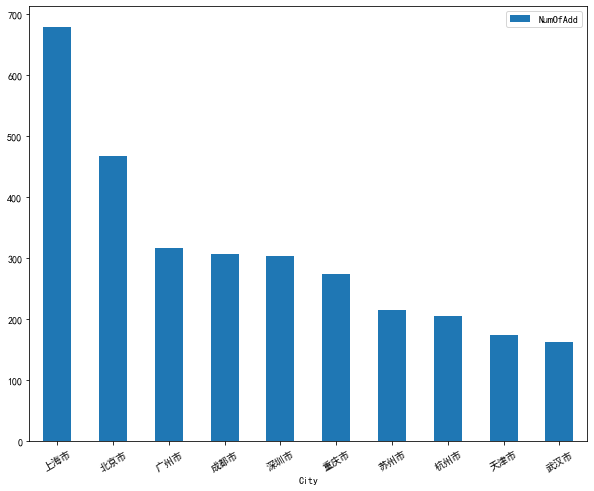

In [79]:
dfCity.groupby(by='City').sum().sort_values(by='NumOfAdd',ascending=False).plot(kind='bar',figsize=(10,8),rot=30)
plt.rcParams['font.sans-serif']=['SimHei']
plt.show()